<center><h1> CO2 Emissions </h1></center>
<img src="https://ca-times.brightspotcdn.com/dims4/default/b4e3aec/2147483647/strip/true/crop/2048x1152+0+0/resize/840x473!/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2F62%2Fe7%2Fb3e1dc06dd9002bc3f3970c44f6c%2Fla-1544035928-vl8yrk0o3v-snap-image" width="500px">

# 1. Importing libraries and data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path ='/kaggle/input/co2-ghg-emissionsdata/co2_emission.csv'
data_emissions = pd.read_csv(path)
data_emissions.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


# 2. Data wrangling

In [3]:
data_emissions.info()

data_emissions.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


Entity                               0
Code                              2207
Year                                 0
Annual CO₂ emissions (tonnes )       0
dtype: int64

In [4]:
data_emissions.drop('Code', axis = 1, inplace=True)

In [5]:
data_emissions.rename(columns={'Annual CO₂ emissions (tonnes )':'CO2'}, inplace=True)

In [6]:
data_emissions.head()

,Entity,Year,CO2
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


# 3. Data visualization

In [7]:

def visualise_country(country):
    
    '''Creating a seperate dataframe'''
    data_emissions_vis = data_emissions[data_emissions['Entity'] == country]
    tot_yr = data_emissions_vis.Year.max() - data_emissions_vis.Year.min()
    tot_em = data_emissions_vis.CO2.sum()
    print(f"Total Co2 Emissions by {country} in {tot_yr} years: {'{:.2f}'.format(tot_em)} tonnes")
    
    '''Plot'''
    fig = sns.lineplot(data=data_emissions_vis, x="Year", y='CO2')
    plt.title('Co2 Emissions by ' + country + ' in '+str(tot_yr)+' years \n', fontsize=20)
    plt.ylabel('Co2 Emissions')
    

Total Co2 Emissions by Spain in 187 years: 14136085451.68 tonnes


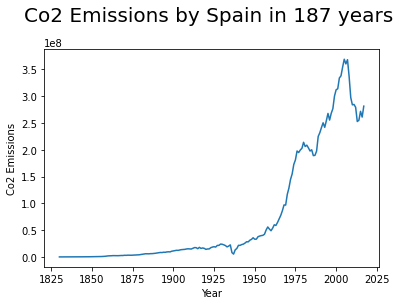

In [8]:
visualise_country('Spain')

In [9]:
total_emissions = data_emissions.groupby('Entity')['CO2'].sum()
total_emissions.sort_values(ascending=False)

Entity
World                       1.575244e+12
United States               3.993783e+11
EU-28                       3.528583e+11
China                       2.001365e+11
Asia and Pacific (other)    1.780573e+11
                                ...     
Niue                        2.715786e+05
Tuvalu                      2.569226e+05
Antarctic Fisheries         1.538880e+05
Kyrgysztan                  0.000000e+00
Statistical differences    -7.713299e+09
Name: CO2, Length: 233, dtype: float64